# Faint Halpha experiment evaluation
**Our hypothesis** The GAN relies on the intensity to distinguish between Halpha and OIII.

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
from xai import read_data, compare_exp_testset
from xai import plot_true_fake_maps, plot_all_r_vs_k, plot_r_single_sample

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Here user input is needed. 
The directory `base_output_dir` points to where the output of the GAN model is stored. The list `names` contains the experiment names and the `results_dir` directory points to where the user wants to save the plots. 
When developing this notebook, the test set included 100 data samples, reflected in the numer `nrun = 100`, but if the users whishes to test on a smaller number of samples to increase the speed of the notebook it can be reduced. 

In [2]:
base_output_dir = "../output/" # Meanwhile I have my own output directory with GAN results
names = ['test', 'xai_exp_only_using_faint_ha' ]
results_dir = "../output/xai_results/"
nrun = 100
nindex = 1
suffix_list = [ "run{:d}_index{:d}".format(i, j) for i in range(nrun) for j in range(nindex) ]
ref_dir = os.path.join(base_output_dir, names[0])
exp_dir = os.path.join(base_output_dir, names[1])

## Comparison of `test` and `xai_exp_only_using_faint_ha`
The following plot visualizes the correlation coefficient between the fake images created in based on the `test` set (mixed signal input) and the fake images created using a scaled by 0.6455 Halpha and normal OIII as input signal. 
On the x-axis we plot the k value in logarithmic scale. Smaller numbers refer to the large scale structure. On the y-axis the correlation coefficient r is shown. 

Each light blue line represents one sample and the red line is the average r for all samples.

Saved plot ../output/xai_results//comparison_of_reconstructed_mixed_signals.png


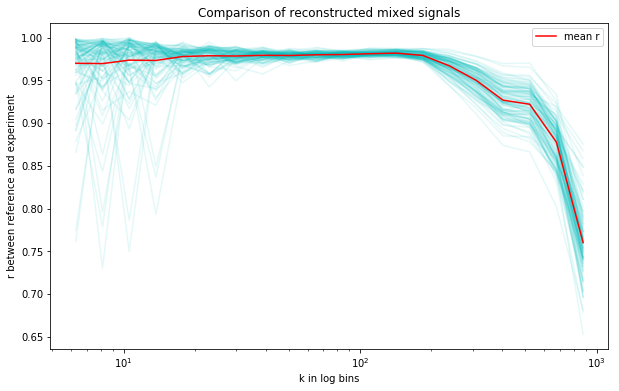

Saved plot ../output/xai_results//comparison_of_reconstructed_halpha_signals.png


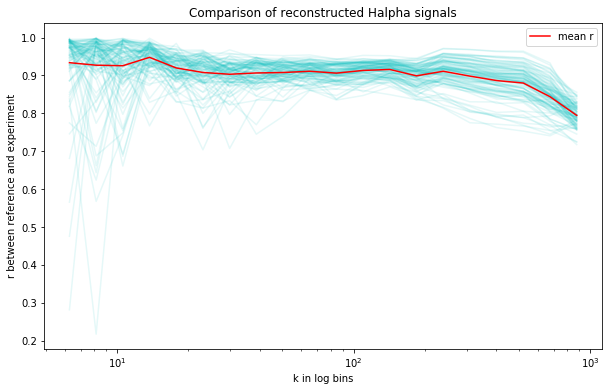

Saved plot ../output/xai_results//comparison_of_reconstructed_oiii_signals.png


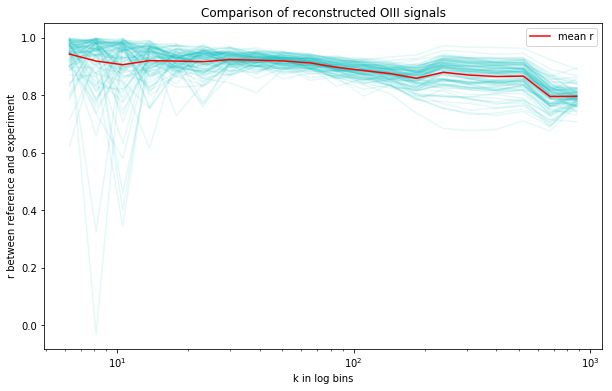

In [3]:
r_mix_list, r_ha_list, r_oiii_list = compare_exp_testset(ref_dir, exp_dir, log_bins=True)
plot_all_r_vs_k(r_mix_list, results_dir, title="Comparison of reconstructed mixed signals")
plot_all_r_vs_k(r_ha_list, results_dir, title="Comparison of reconstructed Halpha signals")
plot_all_r_vs_k(r_oiii_list, results_dir, title="Comparison of reconstructed OIII signals")

## Inspection of individual samples
It is also interesting to check single samples. The following plots maps of the "observed" and "true" singals such as the reconstructed ones followed by the correlation coefficient for this single sample compared to the true values. 

### First the reference `test` set inference
Here the user needs to specify the sample. 

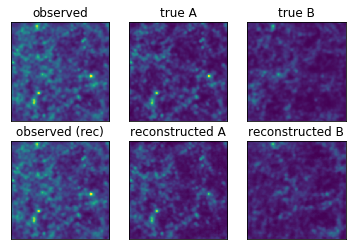

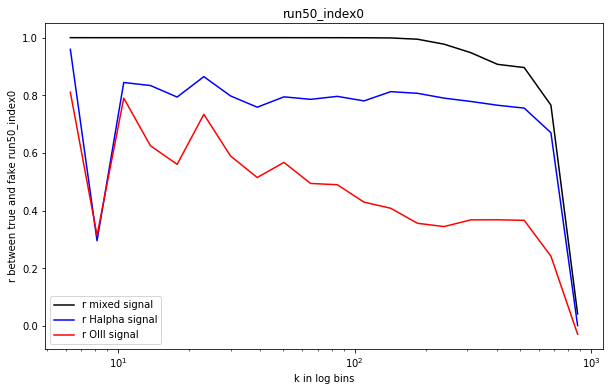

In [9]:
suffix=f"run50_index0" #f"run71_index0" is especially bad
data_ref = read_data(ref_dir, suffix=suffix, ldict=False)
plot_true_fake_maps(data_ref, results_dir)
data_ref = read_data(ref_dir, suffix=suffix, ldict=True)
plot_r_single_sample(data_ref, suffix, log_bins=True)

### Then the xai experiment `xai_exp_only_using_faint_ha`  
In this experiment the "observed" map equals the "true A" map. The OIII signal is missing. So everything reconstructed as OIII is a mistake by the model.

faint_ha


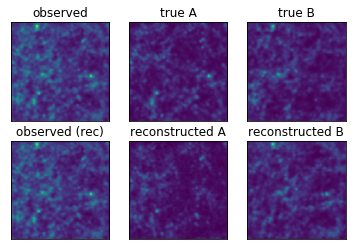

faint_ha


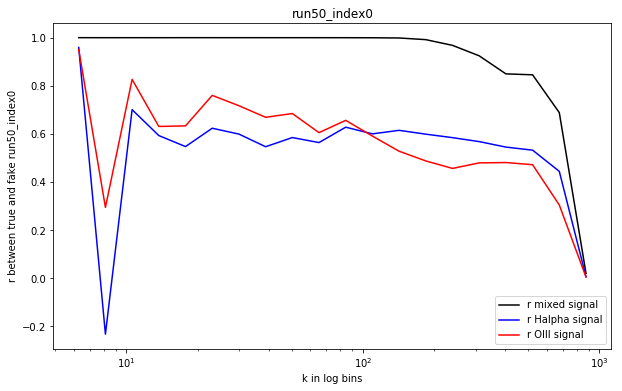

In [10]:
data_exp = read_data(exp_dir, xai_exp='faint_ha', suffix=suffix, ldict=False)
plot_true_fake_maps(data_exp, results_dir)
data_exp = read_data(exp_dir, xai_exp='faint_ha', suffix=suffix, ldict=True)
plot_r_single_sample(data_exp, suffix, log_bins=True)

## Conclusion
**Our hypothesis** The GAN relies on the intensity to distinguish between Halpha and OIII.

Indeed by chaging the brightness of Halpha and making it comparably faint as OIII the GAN model gets confused and performs worse on correctly disentagling the signals. Nevertheless, since the model heavily relies on properly reconstructing the mixed signal it still does a decent job on reconstructing the overall more faint mixed signal. 